<a href="https://colab.research.google.com/github/Magoji91/-Electric-power-consumption/blob/master/Prova_Final_AD_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação Final

## Aprendizado Dinâmico

Profa. **Cibele Russo**

**MBA em Ciências de Dados**

**Atenção: Você deve resolver as questões neste notebook e submetê-lo inteiramente executado no moodle.**

O arquivo de dados **Qualidadedoar.csv** contém dados de qualidade do ar registradas diariamente na Estação Meteorológica da Mooca em São Paulo SP, no período de 01/01/2017 e 31/12/2017, considerando somente a primeira medida do dia do poluente monóxido de carbono (CO).

Fonte: Dados adaptados de Instituto de Energia e Meio Ambiente (https://energiaeambiente.org.br/qualidadedoar/).

1. Faça a leitura dos dados como indicado abaixo, estabeleça um índice por datas. Caso haja dados faltantes para o valor de CO, complete os dados como sugerido. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê? Avalie a estacionariedade utilizando um teste estatístico.


2. Proponha uma decomposição dos dados de monóxido de carbono em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos.


3. Divida a série de monóxido de carbono registradas em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos?


4. Utilizando a base de treinamento de monóxido de carbono registrado, obtenha:

    - As previsões de Holt-Winters.
    
    - As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).
    
    - As previsões com o método Theta usual.
        

5. Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Escolha o método que produz as melhores previsões. Justifique sua resposta. Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos três métodos.



A entrega deve ser feita com um notebook .ipynb, com os códigos usados para a obtenção dos resultados e comentários sobre os resultados em células de texto. Este notebook deve ser comentado de forma a facilmente identificar os códigos de cada análise.

Atenção, se constatado plágio, a questão será zerada.


#### Boa prova!

## Item 1


Faça a leitura dos dados como indicado abaixo, estabeleça um índice por datas. Caso haja dados faltantes para o valor de CO, complete os dados como sugerido. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê? Avalie a estacionariedade utilizando um teste estatístico.


(Adicione quantas células precisar para as análises e conclusões de cada item)

In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [12,6]

caminho = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/Qualidadedoar.csv'

# Leitura dos dados de Qualidade do ar
df = pd.read_csv(caminho, index_col=0, parse_dates=True)

df.head()

,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Data.1
Data,,,,,,,
2017-01-01,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-01
2017-01-02,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-02
2017-01-04,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-04
2017-01-05,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-05
2017-01-06,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-06


**GRÁFICO DE EMISSÃO DE MONÓXIDO DE CARBONO AO LONGO DO TEMPO**

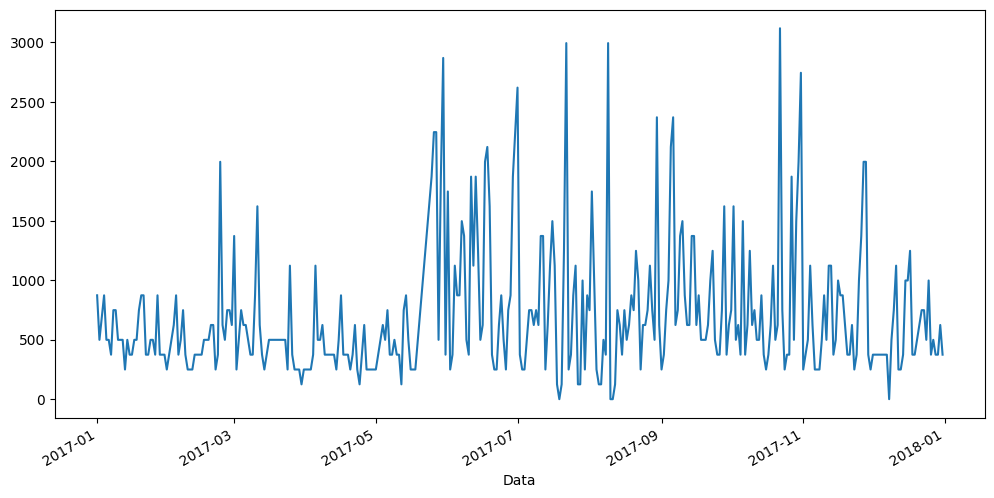

In [55]:
df['Valor'].plot();

In [93]:
# extracting the week number
df['Semanas'] = pd.to_datetime(df['Data.1']).dt.isocalendar().week

df

,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Data.1,week_number,Semanas
Data,,,,,,,,,
2017-01-01,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-01,52,52
2017-01-02,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-02,1,1
2017-01-04,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-04,1,1
2017-01-05,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-05,1,1
2017-01-06,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-06,1,1
...,...,...,...,...,...,...,...,...,...
2017-12-27,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-12-27,52,52
2017-12-28,Mooca,SP40,CO,374.298441,ug/m3,automatica,2017-12-28,52,52
2017-12-29,Mooca,SP40,CO,374.298441,ug/m3,automatica,2017-12-29,52,52


**BOXPLOT DE EMISSÃO DE MONÓXIDO DE CARBONO PRO SEMANAS**

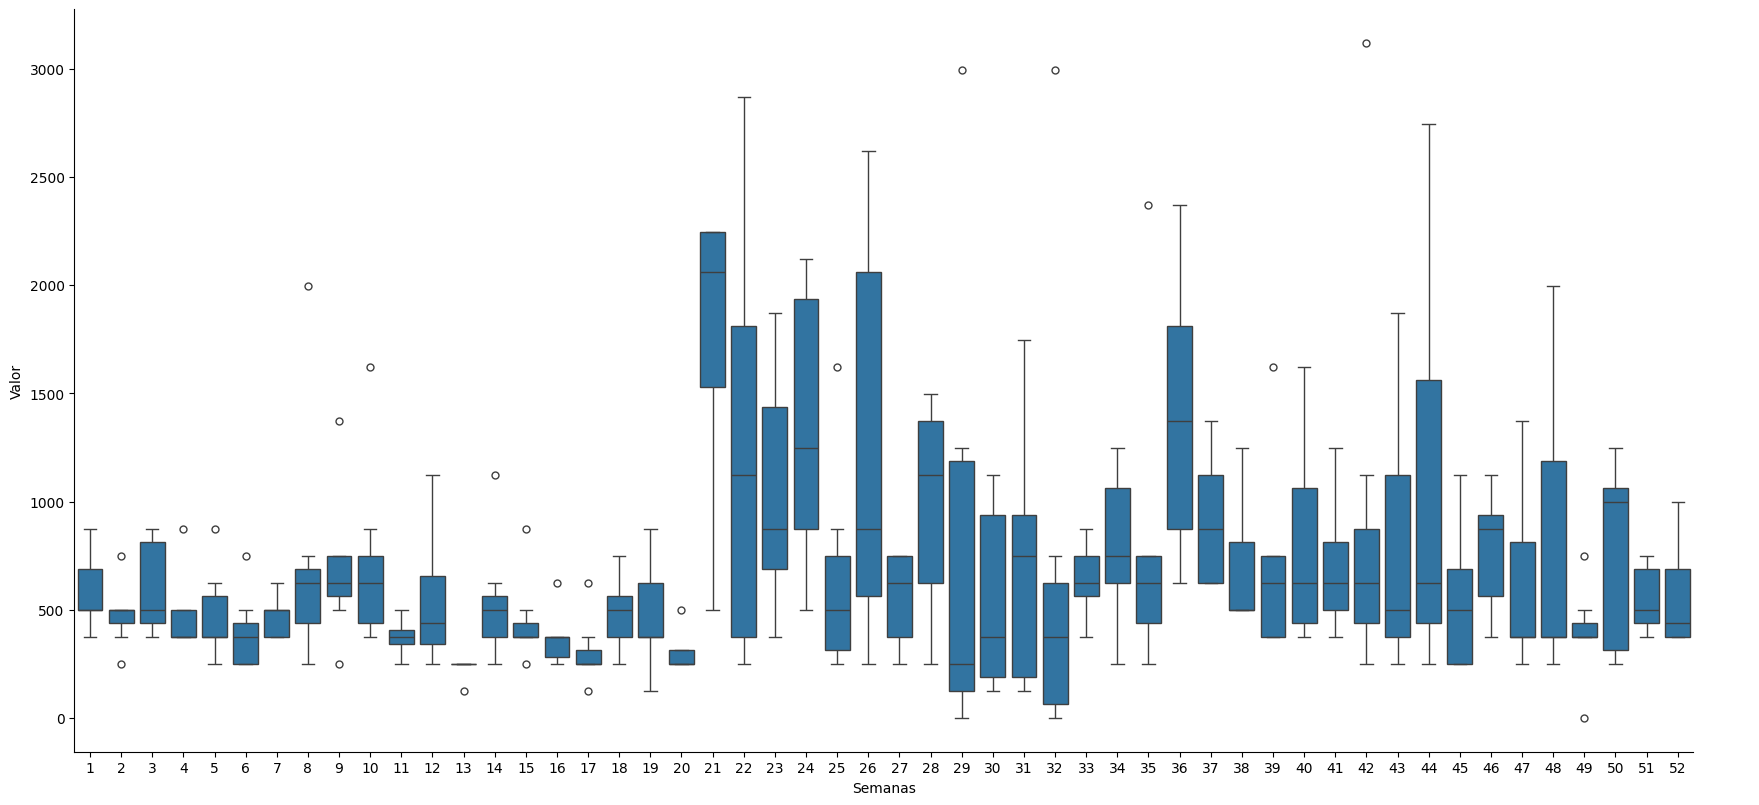

In [95]:
import seaborn as sns

g = sns.catplot(data=df, x='Semanas', y='Valor', kind='box')
g.fig.set_figwidth(20)
g.fig.set_figheight(8.7)

**OBSERVAÇÃO.:** Nos gráfico os valores se apresentam bem distribuídos com valores próximos a média indicando a possibilidade da série ser estacionária.

In [96]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Valor, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.637284
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [97]:
#Instale, se necessário, nas versões sugeridas
!pip install statsmodels==0.13.5
!pip install pmdarima==2.0.3

In [98]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)

In [99]:
# Ajuste de modelo SARIMA

stepwise_fit = auto_arima(df['Valor'], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=5534.730, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5530.785, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5499.590, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5403.386, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5528.788, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=5401.697, Time=0.20 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=5403.428, Time=0.43 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=5405.022, Time=0.87 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=5384.182, Time=0.39 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=5386.172, Time=0.68 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=5386.170, Time=0.90 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=5497.675, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=5382.033, Time=0.60 sec
 ARIMA(2,1,1)(1,0,0)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  351
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2686.022
Date:                Mon, 09 Sep 2024   AIC                           5380.044
Time:                        17:15:36   BIC                           5395.476
Sample:                             0   HQIC                          5386.186
                                - 351                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2623      0.036      7.237      0.000       0.191       0.333
ar.L2         -0.1160      0.049     -2.372      0.018      -0.212      -0.020
ma.L1         -0.9498      0.017    -57.213      0.000      -0.982      -0.917
sigma2      2.699e+05   1.21e+04     22.337      0.000    2.46e+05    2.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               328.67
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.46   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**RESPOSTA.:** utilizando o teste de Dickey-Fuller e o SARIMAX se pode concluir que existe estacionaridade nos dados uma vez que o valor de **p** é menor do que 0,05, assim como o valor de ADF, que foi menor que o valor critico de 5%.

## Item 2

Proponha uma decomposição dos dados de monóxido de carbono em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos.



## Item 3

Divida a série de monóxido de carbono registradas em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos?


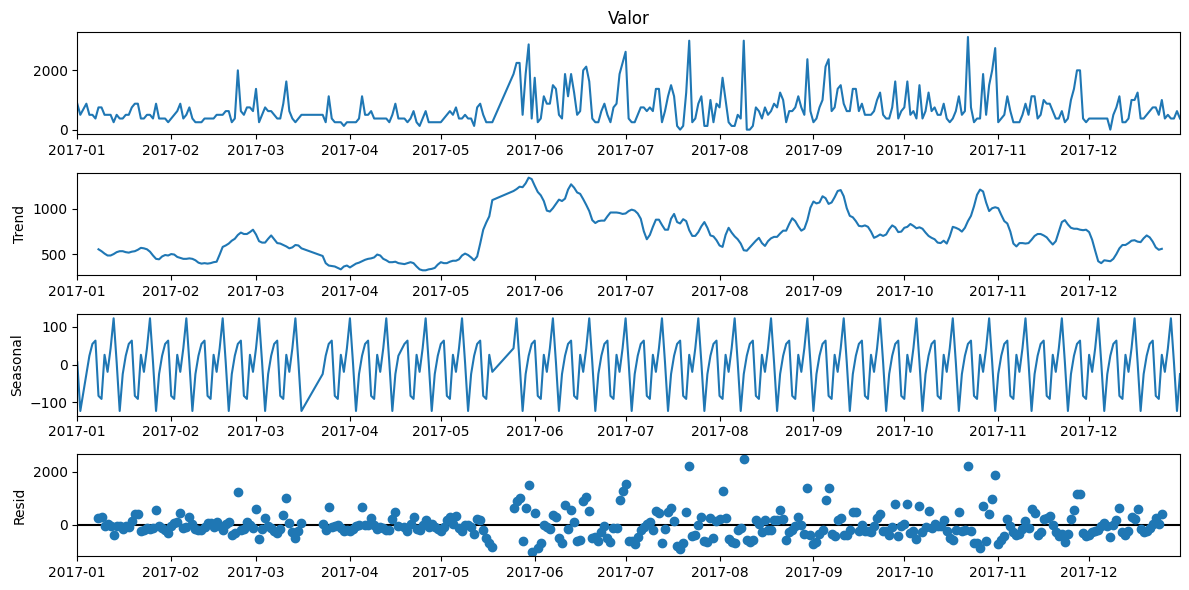

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your data has a monthly frequency
result = seasonal_decompose(df['Valor'], model='additive', period=12)
result.plot();

## Item 4

Utilizando a base de treinamento de monóxido de carbono registrado, obtenha:

    - As previsões de Holt-Winters.
    
    - As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).
    
    - As previsões com o método Theta usual.
    
    - As previsões com um modelo de redes dinâmicas LSTM.
        

        

   

## Item 5

Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Escolha o método que produz as melhores previsões. Justifique sua resposta. Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos quatro métodos.